# Show the radial footprints used 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_maps.my_basemap import draw_centermap, draw_HRRR_map
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, pluck_hrrr_point

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8,8]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [2]:
radii = [5, 10, 20, 40, 60, 80]

In [3]:
def radial_footprint(radius):
    """A footprint with the given radius"""
    y,x = np.ogrid[-radius: radius+1, -radius: radius+1]
    footprint = x**2+y**2 <= radius**2
    footprint = 1*footprint.astype(float)
    return footprint

In [4]:
H = get_hrrr_latlon()

In [5]:
mU = draw_centermap('Utah', size=(4,4))
m = draw_HRRR_map()

loaded /uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_maps/saved_map_objects/HRRR_lcc_i_2000.npy map from file


In [6]:
centerlat = (mU.latmax+mU.latmin)/2
centerlon = (mU.lonmax+mU.lonmin)/2

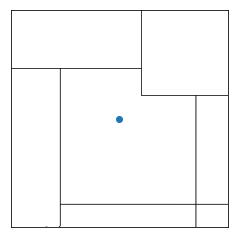

In [7]:
mU.drawstates()
mU.scatter(centerlon, centerlat)

In [8]:
x, y = pluck_hrrr_point(H, centerlat, centerlon, XY_only=True)

 >> Requested Center lat: 40.150032	 lon: -111.862434
 >>     Plucked HRRR lat: 40.15188	 lon: -111.85408
 >>     Plucked from   x: 622	   y: 494


80 240 20081.0 180729.0
60 180 11289.0 101601.0
40 120 5025.0 45225.0
20 60 1257.0 11313.0
10 30 317.0 2853.0
5 15 81.0 729.0


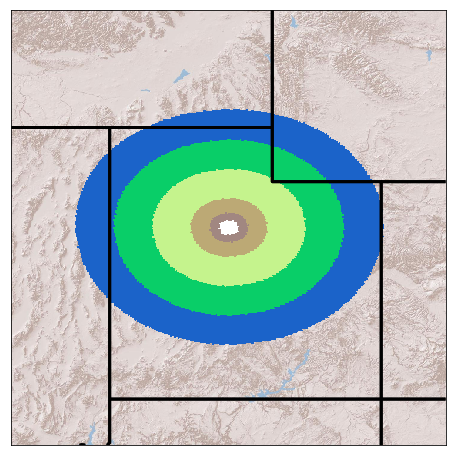

In [24]:
mask = np.zeros_like(H['lat'])
for r in reversed(radii):
    footprint = radial_footprint(r)
    print(r, r*3, np.sum(footprint), np.sum(footprint)*9)
    p, q = np.shape(footprint)
    mask[x-r:x-r+p, y-r:y-r+q] += footprint
mU.pcolormesh(H['lon'], H['lat'], np.ma.array(mask, mask=mask==0), latlon=True, cmap='terrain', vmin=0.6)
mU.drawstates(linewidth=3)
#mU.drawcoastlines()
mU.drawcountries()
mU.arcgisimage(service='World_Shaded_Relief', xpixels=1000)

plt.savefig('./figs/not_shown_footprint_size')

80 240 20081.0 180729.0
60 180 11289.0 101601.0
40 120 5025.0 45225.0
20 60 1257.0 11313.0
10 30 317.0 2853.0
5 15 81.0 729.0


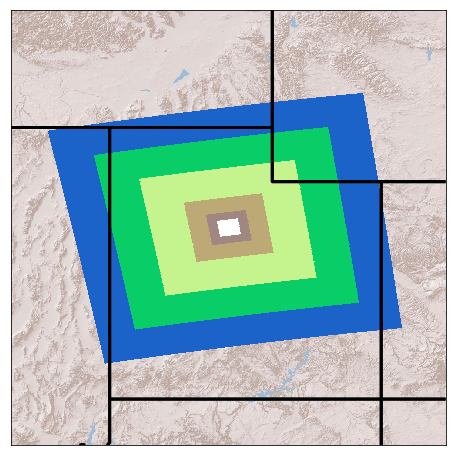

In [23]:
mask = np.zeros_like(H['lat'])
for r in reversed(radii):
    footprint = radial_footprint(r)
    print(r, r*3, np.sum(footprint), np.sum(footprint)*9)
    p, q = np.shape(footprint)
    mask[x-r:x-r+p, y-r:y-r+q] += np.ones_like(footprint)
mU.pcolormesh(H['lon'], H['lat'], np.ma.array(mask, mask=mask==0), latlon=True, cmap='terrain', vmin=0.6)
mU.drawstates(linewidth=3)
#mU.drawcoastlines()
mU.drawcountries()
mU.arcgisimage(service='World_Shaded_Relief', xpixels=1000)

plt.savefig('./figs/not_shown_footprint_size_square')